## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Загрузим датасет mkrf_movies.csv
try:
    st = "C:/Users/Suntory1/Downloads/mkrf_movies.csv"
    movies = pd.read_csv(st.strip("‪u202a"))
except:
    movies = pd.read_csv('/datasets/mkrf_movies.csv')

In [3]:
#Исследуем датафрейм movies.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Видно, что числовая информация в puNumber и ratings, а также даты в show_start_date представлены в строковом формате. Название столбца puNumber записано в camel register вместо snake register.

In [4]:
movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


В датафрейме movies видны дубликаты фильмов.

In [5]:
#Загрузим и исследуем датасет mkrf_shows.csv
try:
    st2 = "C:/Users/Suntory1/Downloads/mkrf_shows.csv"
    shows = pd.read_csv(st2.strip("‪u202a"))
except:
    shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [6]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Видно, что так же, как и в предыдущем датафрейме, имеется столбец puNumber, но с иным типом данных. Поэтому пока объединение таблиц невозможно. Для этого надо сначала унифицировать тип данных столбцов, по которым пройдёт объединение.

In [7]:
#Проверим номера прокатных удостоверений в столбце movies puNumber.
movies['puNumber'].sort_values(ascending=False)

1797           нет
5249     231001111
1011     231001012
3992     226019110
4355     226017410
           ...    
1128     111000113
729      111000112
4768     111000111
3962     111000110
804      111004112
Name: puNumber, Length: 7486, dtype: object

В данном столбце встречается значение "нет", это необходимо учесть при смене типа данных столбца.

In [8]:
#Переведём тип данных в числовой формат, при этом заменим значения "нет" на NaN.
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce')

In [9]:
#Проверим изменение типа данных в столбце.
movies['puNumber'].dtypes
#Тип данных изменён.

dtype('float64')

In [10]:
#Объединим два датасета.
movies = movies.merge(shows, on='puNumber', how='left')

In [11]:
#Проверим наличие присоединённого датасета.
movies.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

К датасету movies успешно добавлен столбец box_office. Исходные столбцы при этом сохранены.

In [12]:
#Напишем название столбца puNumber в snake register, чтобы унифицировать со стилем написания других столбцов.
movies.rename(columns={'puNumber':'pu_number'}, inplace=True)

In [13]:
#Проверим переименование столбца.
movies.columns
#Столбец переименован.

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [14]:
#Также проверим количество строк.
movies.shape[0]

7486

Количество строк осталось неизменным.

**Формирование и первичное исследование датасета:**

Датасеты mkrf_movies.csv и mkrf_shows.csv были соединены в единый датасет movies, при этом была сохранена вся информация из левого датасета.
Названия столбцов были приведены к единому регистру.
Были обнаружены следующие ошибки: неверный тип данных у некоторых столбцов, наличие дубликатов.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [15]:
#Проверим значения в строковом столбце ratings.
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В основном присутствуют вещественные числа, но также есть указания процентов. Их необходимо заменить на вещественные числа, чтобы не потерять при дальнейших манипуляциях.

In [16]:
#Заменим проценты на вещественные числа.
movies = movies.replace({'ratings':{'99%':'9.9', '28%':'2.8', '97%':'9.7','83%':'8.3', '64%':'6.4', '91%':'9.1', '94%':'9.4',  
                                   '62%':'6.2', '79%':'7.9', '90%':'9.0', '19%':'1.9', '88%':'8.8', '89%':'8.9', '98%':'9.8'}})

In [17]:
#Проверим произведенную замену.
movies['ratings'].unique()
#Замена прошла успешно.

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '9.9', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '2.8', '3.7', '1.4', '3.1',
       '9.7', '3.5', '3.2', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '9.1', '9.4', '9.0', '1.9', '1.0', '8.9', '1.3', '1.8',
       '1.2', '1.7', '9.8'], dtype=object)

In [18]:
#Переведём тип данных в числовой формат, при этом строковые значения "nan" будут заменены на числовые NaN.
movies['ratings'] = pd.to_numeric(movies['ratings'], errors='coerce')

In [19]:
#Проверим изменение типа данных в столбце ratings.
movies['ratings'].dtypes
#Тип данных изменён.

dtype('float64')

In [20]:
#Поменяем тип данных в строковом столбце show_start_date.
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format='%Y-%m-%d')

In [21]:
#Проверим изменение типа данных в столбце show_start_date.
movies['show_start_date'].dtypes
#Тип данных изменён.

datetime64[ns, UTC]

**Типы данных:**
Были исправлены типы данных в столбцах ratings и show_start_date со строкового на числовой и datetime.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [22]:
#Проверяем наличие пропущенных значений в столбцах.
movies.isnull().sum().sort_values() 

title                       0
show_start_date             0
type                        0
age_restriction             0
pu_number                   1
production_country          2
director                    9
film_studio                18
producer                  568
ratings                   967
genres                    976
box_office               4328
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
dtype: int64

В 12 из 16 столбцов встречаются пропуски.  
В столбцах budget, refundable_support, nonrefundable_support и financing_source наибольшее и при этом одинаковое количество пропусков. Вероятно, это связано с тем, что эти столбцы отражают взаимосвязанную информацию: budget указывает на общий бюджет фильма, а столбцы refundable_support и nonrefundable_support - на части его госфинансирования. Вероятно NaN в refundable_support и nonrefundable_support показывает отсутствие госфинансирования и, следовательно, может быть заменён на 0.  
В столбце financing_source NaN, вероятно, показывает отсутствие источника госфинансирования и, следовательно, может быть замен на слово "отсутствует". Эти столбцы требуют дальнейшего изучения.

In [23]:
#Проверим процент пропусков от всех значений в датафрейме.
movies.isnull().sum().sort_values()/movies.shape[0] * 100 

title                     0.000000
show_start_date           0.000000
type                      0.000000
age_restriction           0.000000
pu_number                 0.013358
production_country        0.026717
director                  0.120224
film_studio               0.240449
producer                  7.587497
ratings                  12.917446
genres                   13.037670
box_office               57.814587
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
dtype: float64

В столбцах budget, refundable_support, nonrefundable_support и financing_source пропуски составляют 95% всех значений. 
Такое количество пропусков нельзя удалять, поскольку это сделает анализ данных крайне недостоверным.
Пропуски в этих столбцах требуют дальнейшего изучения и, возможно, замены.
Пропуски в столбцах producer, ratings, genres и особенно в столбце box_office составляют солидную часть значений, 
но не могут быть заменены, поскольку, по-видимому, отражают объективную нехватку информации по этим критериям.
В столбцах film_studio, director, production_country, pu_number пропуски составляют менее 1% от всех значений,
следовательно ими можно пренебречь.

In [24]:
#Изучим столбец budget.
bd_movies = movies[movies['budget']>=0]

In [25]:
bd_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    float64            
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

Только у 332 кинолент указан общий бюджет.

In [26]:
bd_movies['production_country'].value_counts()

Россия                                        316
Россия, Италия                                  2
Россия, Германия                                2
Россия, Франция, Латвия                         1
Россия-Украина                                  1
Россия, Украина, Польша                         1
Россия, Германия, Великобритания                1
Россия, Армения                                 1
Россия-Словакия-Чехия                           1
Россия, Латвия, Чешская Республика              1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Сербия                                  1
Россия - Грузия                                 1
Россия-Китай                                    1
Россия, Бельгия, Финляндия                      1
Name: production_country, dtype: int64

Все киноленты, для которых указан бюджет, были либо сняты в РФ (316 фильмов), либо при её участии (16 фильмов).

In [109]:
#Проверим есть ли российские фильмы, для которых не указан бюджет.
movies[(movies['budget'].isna())&(movies['production_country']=='Россия')].shape[0]
#Да, такие фильмы есть.

1505

In [28]:
#Проверим указаны ли бюджеты заграничных кинокартин.
non_rus_movies = movies[(movies['budget']>=0)&(movies['production_country']!='Россия')]

In [29]:
list(non_rus_movies['production_country'].unique())

['Россия, Франция, Латвия',
 'Россия-Украина',
 'Россия, Италия',
 'Россия, Украина, Польша',
 'Россия, Германия, Великобритания',
 'Россия, Германия',
 'Россия, Армения',
 'Россия-Словакия-Чехия',
 'Россия, Латвия, Чешская Республика',
 'Россия, Германия, Казахстан, Польша, Китай',
 'Россия, Сербия',
 'Россия - Грузия',
 'Россия-Китай',
 'Россия, Бельгия, Финляндия']

Вывод: бюджеты указаны только у части фильмов, отснятых в современной России или при её участии.
Следовательно, NaN, указанные в столбце budget, обозначают отсутствие информации о бюджете данного фильма и не могут быть заменены на 0.

In [30]:
#Исследуем столбец с возвратной частью господдержки.
refund = movies[movies['refundable_support']>=0]

In [31]:
refund.shape[0]

332

Возвратная часть господдержки так же, как и бюджет, указана только для 332 кинокартин. 
Проверим те же ли это киноленты, для которых указан бюджет.

In [32]:
refund_budget = movies[(movies['refundable_support']>=0)&(movies['budget']>=0)]

In [33]:
refund_budget.shape[0]

332

Число кинокартин совпадает.

In [34]:
#Проверим есть ли кинокартины, для которых указана возвратная часть господдержки, но не бюджет.
refund_offbudget = movies[(movies['refundable_support']>=0)&(movies['budget'].isna())]

In [35]:
refund_offbudget.shape[0]

0

Таких картин нет. Таким образом, столбцы budget и refundable_support заполнены только для части фильмов, снятых в современной России. 
Пропуски в столбце refundable_support, могут быть заменены на 0, поскольку обозначают отсутствие господдержки, оказываемой госорганами. Можно предположить, что аналогичным образом обстоят дела со столбцом nonrefundable_support.

In [36]:
#Проверим связаны ли столбцы budget и nonrefundable_support.
nonrefund_budget = movies[(movies['nonrefundable_support']>=0)&(movies['budget']>=0)]

In [37]:
nonrefund_budget.shape[0]

332

In [38]:
#Проверим есть ли кинокартины, для которых указана невозвратная часть господдержки, но пропущен бюджет.
nonrefund_offbudget = movies[(movies['nonrefundable_support']>=0)&(movies['budget'].isna())]

In [39]:
nonrefund_offbudget.shape[0] 

0

Такие картины не найдены. 
Следовательно столбцы budget, refundable_support и nonrefundable_support заполнены только для некоторых фильмов, произведённых в современной РФ. Таким образом, пропуски, указанные в столбце nonrefundable_support для иных кинофильмов, обозначают отсутствие господдержки и могут быть заменены на 0.

In [40]:
#Обозначим отсутствие госфинансирования и связанных с ним возвратов в столбцах refundable_support и nonrefundable_support 
#с помощью 0.
movies[['refundable_support', 'nonrefundable_support']] = \
movies[['refundable_support', 'nonrefundable_support']].fillna(0)

In [41]:
#Проверим осуществлённую замену.
movies[['refundable_support', 'nonrefundable_support']].isna().sum()
#Замена прошла успешно.

refundable_support       0
nonrefundable_support    0
dtype: int64

In [42]:
#Проверим для каких фильмов указаны источники госфинансирования.
finsource_budget = movies[~(movies['financing_source'].isna())&(movies['budget']>=0)]

In [43]:
finsource_budget.shape[0]

332

Как и предыдущие столбцы, столбец financing_source, по-видимому, заполнен только для некоторых современных российских фильмов.
Необходимо убедиться в этом, для этого проверим есть ли иностранные фильмы с указанием источников госфинансирования.

In [44]:
finsource_offbudget = movies[~(movies['financing_source'].isna())&(movies['budget'].isna())]

In [45]:
finsource_offbudget.shape[0]

0

У иностранных фильмов и фильмов, снятых в СССР, не указаны источники госфинансирования. 
Следовательно NaN в столбце financing_source для этих фильмов можно заменить на слово "отсутствует".

In [46]:
#Обозначим отсутствие источников госфинансирования с помощью слова "отсутствует".
movies['financing_source'] = movies['financing_source'].fillna('отсутствует')

In [47]:
#Проверим осуществлённую замену.
movies['financing_source'].isna().sum()
#Замена прошла успешно.

0

**Пропущенные значения:**

В 12 из 16 столбцов обнаружены пропущенные значения. В некоторых столбцах они составляли 95%.
В 4х столбцах пропуски составляют менее 1%, следовательно, ими можно пренебречь. 
В столбцах budget, producer, ratings, genres, box_office замена невозможна, поскольку у нас нет соответствующих данных.
В столбцах refundable_support и nonrefundable_support пропуски были заменены на 0 и обозначают 0 рублей, полученных из и возвращенных в бюджет. В столбце financing_source NaN, по-видимому, обозначал отсутствие источника госфинансирования и потому был заменён на слово "отсутствует".

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [48]:
#Проверим наличие полных дубликатов.
movies.duplicated().sum() 

0

Проверка на полные дубликаты показала их отсутствие.

In [49]:
#Попробуем поискать дубликаты среди кинолент.
movies['title'].duplicated().sum()

714

Примерно у 10% фильмов есть дубликаты.

In [50]:
movies['title'].value_counts()

День святого Валентина_                               5
Кошки против собак: Месть Китти Галор                 4
Знакомство с Факерами 2.                              4
Рапунцель: Запутанная история                         4
Секс в большом городе 2                               4
                                                     ..
МУЛЬТ в кино. Выпуск № 14                             1
Стажёр                                                1
Мэхэббэт - ул йорэк эше (Любовь - это дело сердца)    1
Иван Грозный - 2 серия (восстановленная версия)       1
Машины песенки. Серия "Когда цветут кактусы"          1
Name: title, Length: 6772, dtype: int64

In [ ]:
Видно, что у киноленты может быть до 5 дублей.

In [51]:
#Попробуем поискать дубликаты среди прокатных удостоверений.
movies['pu_number'].duplicated().sum()

2

Среди прокатных удостоверений практически нет дубликатов. 
Следовательно по какой-то причине одному и тому же фильму могут присваивать несколько прокатных удостоверений. 

In [52]:
#Сформируем датафрейм с информацией о фильмах с одинаковым названием.
movies[movies['title'].duplicated(keep=False)].sort_values(by='title')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712.0,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0.0,0.0,NaN,отсутствует,6.1,комедия,NaN
454,100 миллионов евро,221024616.0,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0.0,0.0,NaN,отсутствует,6.1,комедия,NaN
4852,127 часов,121000811.0,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0.0,0.0,NaN,отсутствует,7.7,"триллер,биография,драма",NaN
5058,127 часов,221069011.0,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0.0,0.0,NaN,отсутствует,7.7,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616.0,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,0.0,0.0,NaN,отсутствует,6.7,"боевик,триллер,драма",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,Я ненавижу день святого Валентина,221139210.0,2010-12-03 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0.0,0.0,NaN,отсутствует,5.0,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213.0,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0.0,0.0,NaN,отсутствует,6.3,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116.0,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0.0,0.0,NaN,отсутствует,6.3,"комедия,мелодрама,драма",NaN
6379,Ян Антонышев,112011818.0,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,NaN,отсутствует,NaN,NaN,NaN


Из датафрейма видно, что фильмы с одинаковыми названиями выходили в прокат в разное время. Следовательно удалять такие дубликаты нельзя, потому что это повлияет на статистику по годам.

**Дубликаты:**

В датафрейме не выявлено полных дубликатов.  Примерно 10% фильмов указано в данных более одного раза. Это связано с тем, что один и тот же фильм мог выходить в прокат несколько раз в разные годы.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [53]:
#Изучим категориальные столбцы.
movies.head(20)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,отсутствует,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,NaN,отсутствует,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,отсутствует,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,отсутствует,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,отсутствует,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816.0,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,0.0,0.0,NaN,отсутствует,7.7,драма,NaN
6,Любовь и голуби,111007013.0,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,NaN,отсутствует,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614.0,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,0.0,0.0,NaN,отсутствует,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416.0,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,0.0,0.0,NaN,отсутствует,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114.0,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,0.0,0.0,NaN,отсутствует,7.8,"мелодрама,комедия",NaN


В столбцах genres, production_country и др. в одной ячейке встречается несколько значений, перечисленных через запятую. Это усложняет поиск и анализ информации. Вероятно, следовало бы создать отдельные колонки для каждого значения, например, production_country1, production_country2 и т.д.

In [54]:
list(movies['type'].unique())

['Художественный',
 'Анимационный',
 'Прочие',
 'Документальный',
 'Научно-популярный',
 ' Художественный',
 ' Анимационный',
 'Музыкально-развлекательный']

В списке уникальных типов есть неявные дубликаты, которые образовались из-за пробелов, стоящих перед типом.

In [55]:
#Удалим пробелы.
movies['type'] = movies['type'].str.strip()

In [56]:
list(movies['type'].unique())

['Художественный',
 'Анимационный',
 'Прочие',
 'Документальный',
 'Научно-популярный',
 'Музыкально-развлекательный']

Дубликаты типов с пробелами исчезли.

**Категориальные значения:**

В некоторых столбцах с категориальными значениями в одной ячейке указано более одного значения, что осложняет поиск и анализ данных.
В столбце type были удалены дубликаты типов.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [57]:
#Изучим основные количественные столбцы.
movies[['budget', 'refundable_support', 'nonrefundable_support']].sort_values(by='budget', ascending=False).head(20)

,budget,refundable_support,nonrefundable_support
7114,2.305074e+09,180000000.0,90000000.0
5437,1.032906e+09,110000000.0,190000000.0
7464,9.800000e+08,100000000.0,400000000.0
7474,9.440000e+08,100000000.0,400000000.0
7171,7.799420e+08,0.0,60000000.0
3351,6.842005e+08,150000000.0,300000000.0
2920,6.352839e+08,50000000.0,392104482.0
5653,5.901922e+08,0.0,400000000.0
6549,5.637847e+08,60000000.0,120000000.0
3255,5.284420e+08,75000000.0,175000000.0


Видно, что в некоторых случаях общий бюджет фильма значительно превышает сумму госфинансирования. Это возможно, потому что у фильма, помимо госорганов, могут быть и другие (частные) источники финансирования. Невероятной кажется обратная ситуация, когда господдержка оказывается больше общего бюджета фильма

In [58]:
#Проверим, бывают ли случаи, когда общий бюджет фильма меньше, чем господдержка.
movies['diff'] = movies['budget'] - (movies['refundable_support'] + movies['nonrefundable_support'])

In [59]:
movies['diff'][movies['diff'] < 0]

2053    -23000000.0
2058    -75000000.0
2472    -80000000.0
2532    -20000000.0
2615   -160000000.0
2684    -59000000.0
2788    -35000000.0
2874     -6000000.0
3047    -70000000.0
3565   -250000000.0
3675    -40000000.0
3739    -45000000.0
5673    -60000000.0
5806    -70000000.0
6008    -80000000.0
6323   -138969465.0
6823   -180000000.0
Name: diff, dtype: float64

Есть 17 фильмов, чей бюджет меньше полученного ими госфинансирования. Трудно сказать, что значит этот показатель. Возможно, это фильмы, при производстве которых не были полностью потрачены полученные ими госсредства. Нужно исследовать эти фильмы поподробнее.

In [60]:
#Проверим финансовые показатели этих фильмов.
movies[movies['diff'] < 0][['budget', 'refundable_support', 'nonrefundable_support']]

,budget,refundable_support,nonrefundable_support
2053,0.0,0.0,23000000.0
2058,0.0,0.0,75000000.0
2472,0.0,10000000.0,70000000.0
2532,0.0,20000000.0,0.0
2615,0.0,60000000.0,100000000.0
2684,0.0,0.0,59000000.0
2788,0.0,0.0,35000000.0
2874,0.0,0.0,6000000.0
3047,0.0,19000000.0,51000000.0
3565,0.0,0.0,250000000.0


Эти фильмы получали поддержку от государства, но у них по какой-то причине указан нулевой бюджет. Отсюда и отрицательная разница в столбце diff.

In [61]:
#Удалим более ненужный столбец.
movies = movies.drop(columns='diff') 

**Количественные значения:**

При анализе столбцов, содержащих количественные значения, была обнаружена странность: общий бюджет нескольких фильмов оказался меньше, полученного ими госфинансирования. Это требует дополнительных данных и анализа.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [62]:
#Добавим столбец year, указывающий год проката.
movies['year'] = pd.DatetimeIndex(movies['show_start_date']).year

In [63]:
#Проверим наличие нового столбца.
movies['year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: year, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [64]:
#Добавим столбец с указанием главного режиссера. Для этого извлечем имя первого режиссера, указанного в столбце director.
movies['main_director'] = movies['director'].str.split(',',expand=True)[0]

In [65]:
#Проверим новый столбец main_director.
movies['main_director'].head()

0        Кевин Костнер
1            Е.Матвеев
2    Тимур Бекмамбетов
3    Тимур Бекмамбетов
4    Тимур Бекмамбетов
Name: main_director, dtype: object

In [66]:
#Добавим столбец с указанием главного жанра фильма. Для этого извлечем первый жанр, указанный в столбце genres.
movies['main_genre'] = movies['genres'].str.split(',',expand=True)[0]

In [67]:
#Проверим новый столбец main_genre.
movies['main_genre'].head()

0        боевик
1         драма
2    фантастика
3    фантастика
4    фантастика
Name: main_genre, dtype: object

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [68]:
#Ранее мы выяснили, что бюджеты, а также возвращаемые и невозвращаемые части господдержки, 
#указаны только у части современных российских фильмов. Отсортируем эти фильмы. 
supported_movies = movies[movies['budget']>0]

In [69]:
#Добавим столбец ratio, который покажет, сколько процентов от общей стоимости фильма составляет господдержка.
supported_movies['ratio'] = \
(supported_movies['refundable_support']+supported_movies['nonrefundable_support'])/supported_movies['budget']*100

C:\Users\Suntory1\AppData\Local\Temp\ipykernel_21804\4249085957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supported_movies['ratio'] = \


In [70]:
#Рассмотрим столбец ratio поподробнее.
supported_movies['ratio'].describe()

count    315.000000
mean      51.738582
std       17.004298
min        4.404305
25%       37.345810
50%       59.226455
75%       65.693118
max       78.474525
Name: ratio, dtype: float64

Медианное значение господдержки - 51%. Как правило, фильмы получают поддержку в размере от 37% до 65%. Максимальная господдержка составляет 78% от общего бюджета фильма. Есть фильмы, которые получили лишь 4% господдержки

**Новые столбцы:**

К датафрейму было добавлено 3 новых столбца: year, main_director, main_genre.  Также была посчитано, что, как правило, доля господдержки в общем бюджете спонсируемого фильма составляет примерно от 37% до 65%.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [71]:
#Посмотрим, сколько фильмов выходило в прокат каждый год.
year_info = movies.groupby('year')['title'].count()

In [72]:
year_info

year
2010    985
2011    622
2012    593
2013    630
2014    807
2015    705
2016    818
2017    505
2018    891
2019    930
Name: title, dtype: int64

In [73]:
year_info.describe()

count     10.00000
mean     748.60000
std      160.84582
min      505.00000
25%      624.00000
50%      756.00000
75%      872.75000
max      985.00000
Name: title, dtype: float64

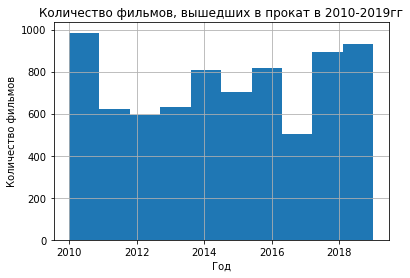

In [74]:
movies.hist('year', bins=10)
plt.title('Количество фильмов, вышедших в прокат в 2010-2019гг')
plt.xlabel('Год') 
plt.ylabel('Количество фильмов');

Из гистограммы и табличной информации выше видно, что количество фильмов, вышедших в прокат с 2010 по 2019гг, сильно разнится от года к году. Максимальный показатель - 985 фильмов в 2010 году, минимальный - 505 в 2017 году. В среднем ежегодно выходило около 750 фильмов. В целом с 2014 видна тенденция к увеличению количества фильмов в прокате, однако рекорд 2010 года так и не был побит.

In [75]:
#Посмотрим, сколько фильмов выходило в прокат каждый год и по скольким известны кассовые сборы.
box_info = movies.pivot_table(index='year', values=['title', 'box_office'], aggfunc='count')

In [76]:
box_info
#Видно, что с каждым годом учет кассовых сборов становился полнее.

,box_office,title
year,,
2010,105,985
2011,109,622
2012,128,593
2013,184,630
2014,279,807
2015,465,705
2016,526,818
2017,357,505
2018,475,891


In [77]:
#Изучим, какую долю составляют фильмы с известной суммой сборов в прокате от общего числа фильмов.
box_info['ratio'] = round((box_info['box_office']/box_info['title'])*100, 2)

In [78]:
box_info['ratio']

year
2010    10.66
2011    17.52
2012    21.59
2013    29.21
2014    34.57
2015    65.96
2016    64.30
2017    70.69
2018    53.31
2019    56.99
Name: ratio, dtype: float64

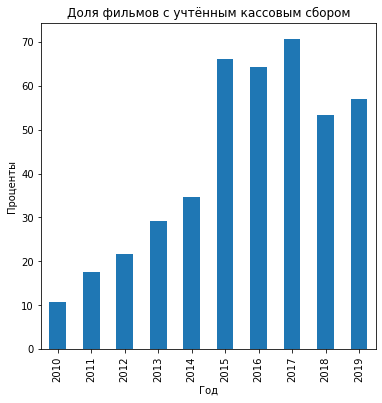

In [110]:
box_info['ratio'].plot(kind='bar', figsize=(6, 6))
plt.title('Доля фильмов с учтённым кассовым сбором')
plt.xlabel('Год')
plt.ylabel('Проценты');

Видно, что доля фильмов, по которым известны данные по кассовым сборам, стабильно росла до 2018 года. С 2015 года доля таких фильмов превышает половину от всех кинолент, вышедших в прокат.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [80]:
#Определим года с минимальным и максимальным кассовыми сборами.
movies.groupby('year')['box_office'].sum()

year
2010    2.428654e+06
2011    1.410276e+07
2012    6.955423e+06
2013    2.979971e+07
2014    7.444952e+09
2015    3.949737e+10
2016    4.786630e+10
2017    4.856371e+10
2018    4.966840e+10
2019    4.842571e+10
Name: box_office, dtype: float64

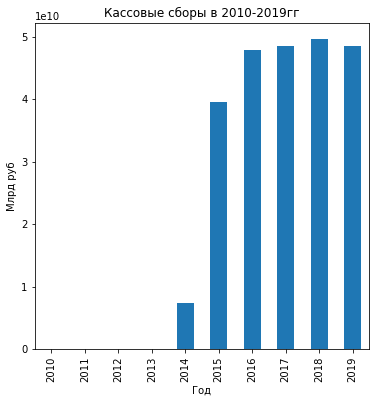

In [81]:
#Отобразим рост кассовых сборов на графике.
movies.groupby('year')['box_office'].sum().plot(kind='bar', figsize=(6, 6))
plt.title('Кассовые сборы в 2010-2019гг')
plt.xlabel('Год')
plt.ylabel('Млрд руб');

Из табличных данных выше выходит, что минимальные сборы приходятся на 2010 год, максимальные - на 2018 год. За этот период кассовые сборы возросли примерно в 20000 раз. Однако необходимо помнить, что в 2010 году кассовые сборы были известны только у 10% фильмов, тогда как в 2018 году этот показатель составил уже 53%. Следовательно общий рост кассовых сборов объясняется не только финансовыми успехами фильмов, но и улучшением административного учета.  
На гистограмме видно, что сумма кассовых сборов была крупнейшей и почти неизменной в период с 2016-2019гг. В 2014 кассовые сборы были намного меньше. Это переломный год. С этого года на порядок увеличились сборы. В 2010-2013гг кассовые сборы настолько малы по сравнению с аналогичными показателями за 2014-2019, что их даже не видно на графике. Повторим: такой значительный рост кассовых сборов связан не только с финансовыми успехами фильмов, но и с увеличением числа фильмов, у которых учтен кассовый сбор.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [82]:
#Посчитаем медианы и среднее арифметическое кассовых сборов за каждый год.
movies.pivot_table(index='year', values='box_office', aggfunc=['median', 'mean'])
#Среднее арифметическое значительно превышает медианы. Это говорит о наличии ярких выбросов.

,median,mean
,box_office,box_office
year,,
2010,1700.000,2.313004e+04
2011,3000.000,1.293832e+05
2012,5660.000,5.433924e+04
2013,3522.500,1.619549e+05
2014,18160.000,2.668442e+07
2015,4920933.000,8.494057e+07
2016,3846679.410,9.100057e+07
2017,9968340.000,1.360328e+08


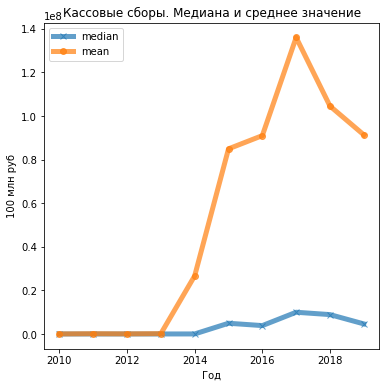

In [83]:
#Построим общий график для медианных и средних сумм кассовых сборов.
ax = movies.pivot_table(index='year', values='box_office', aggfunc='median').plot(
          y='box_office',
          style='x-',
          linewidth=5,
          alpha=0.7,
          label='median',
          figsize=(6,6)
)

movies.pivot_table(index='year', values='box_office', aggfunc='mean').plot(
        y='box_office',
        style='o-',        
        ax=ax,
        linewidth=5,
        alpha=0.7,
        label='mean',
        figsize=(6,6)
)
plt.title('Кассовые сборы. Медиана и среднее значение')
plt.xlabel('Год')
plt.ylabel('100 млн руб');

Из графика видно, что до 2013 года медиана и среднее почти не отличались. В это время количество фильмов с известной суммой кассового сбора было около 10%. С 2013 среднее значение начинает резко возрастать. Ранее мы обнаружили, что именно с этого момента резко увеличилось количество фильмов, для которых известна сумма кассового сбора. 
В целом изменения в среднем значении коррелируют с изменением доли фильмов с известным кассовым сбором и достигают максимума, когда достигает максимума доля фильмов с известным кассовым сбором в 2017 году (70% от всех фильмов в прокате).
Среди учтенных фильмов могут находиться фильмы с очень крупными кассовыми сборами - т.н. выбросы. Именно они могли вызвать резкий взлёт средних сумм по сравнению с медианными суммами.

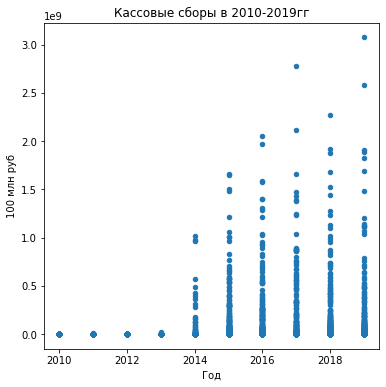

In [84]:
#Проверим наличие выбросов по кассовым сборам.
movies.plot.scatter(x='year', y='box_office', figsize=(6,6))
plt.title('Кассовые сборы в 2010-2019гг')
plt.xlabel('Год')
plt.ylabel('Млрд руб');

Действительно количество выбросов сильно возросло после 2013, чем, вероятно, и объясняется рост среднего значения и его значительное отличие от медианы.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [85]:
#Создадим датафрейм, содержащий все фильмы, вышедшие в период с 2015 по 2019, для которых известны кассовые сборы.
movies_exam = movies[~(movies['budget'].isna())&(movies['year']>=2015)]

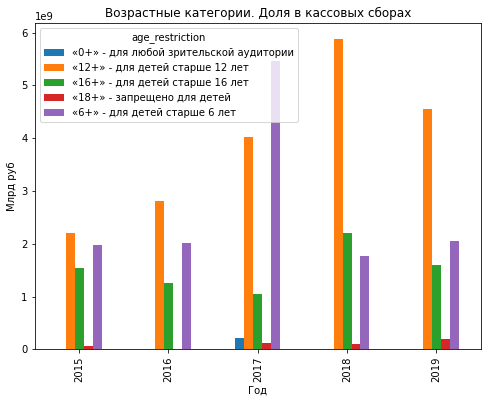

In [86]:
#Исследуем график, чтобы определить, как возрастная категория фильма влияет на продажи билетов.
movies_exam.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum').plot(kind='bar', figsize=(8, 6))
plt.title('Возрастные категории. Доля в кассовых сборах')
plt.xlabel('Год')
plt.ylabel('Млрд руб');

Из графика видно, что суммы кассовых сборов, собранные разными категориями, существенно различаются.  
Категорию "12+" можно назвать локомотивом кинопроката. Это ежегодный лидер продаж. Исключение составляет 2017 год, когда пальма первенства досталась категории "6+".  
Категория "6+", как правило, занимает 2 место по популярности. За ней следует категория "16+".  
Очевидными аутсайдерами являются категории "18+" и особенно "0+". Фильмов этих категорий настолько мало, что они даже не каждый год представлены в графике.

**Анализ датасета movies:**

Мы определили, что количество фильмов, вышедших в прокат с 2010 по 2019, сильно варьировалось от года к году. Нет ярко выраженной тенденции к понижению или увеличению с течением времени. Максимальный показатель - 985 фильмов - был достигнут в 2010. На втором месте - 2019 с показателем в 930 фильмов. Минимальным показатель был в 2017 - 505 фильмов. В среднем в изучаемый период ежегодно выходило около 750 фильмов. 
   
   
Доля фильмов с известным кассовым сбором, напротив, имеет четкую тенденцию к увеличению с каждым годом: данный показатель непрерывно рос с 2010 до 2017 (с 11% до 70%), в 2018 и в 2019гг он составил немногим более 50%. В целом кассовые сборы выросли за исследуемый период в примерно 20000 раз. Такой грандиозный рост объясняется не только коммерческим успехом кинолент, но и значительным увеличением доли фильмов с известным кассовым сбором в анализе.
   
   
Были исследованы медианы и среднее значение: примерно с 2013 среднее значение резко возросло, что связано с появлением выбросов - фильмов с очень крупными кассовыми сборами.
   
   
Также было выяснено, что возрастные категории значительно влияют на кассовые сборы. Явными лидерами являются категории "12+" и "6+". Категории "0+" и "18+", напротив, являются наименее доходными.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [87]:
#Сформируем датафрейм, который содержит данные только о фильмах с господдержкой.
gov_movies = movies[(movies['nonrefundable_support']>0)|(movies['refundable_support']>0)]

In [88]:
gov_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    float64            
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

В датафрейме 332 фильма. Для каждого из них известна сумма господдержки. Кассовые сборы известны для 318 кинолент.

In [89]:
#Изучим, сколько невозвратных средств ежегодно выделялось на финансирование кинопроизводства.
gov_movies_nonref = gov_movies.pivot_table(index='year', values='nonrefundable_support', aggfunc='sum')

In [90]:
gov_movies_nonref

,nonrefundable_support
year,
2013,1.343479e+08
2014,5.010023e+08
2015,3.019088e+09
2016,3.381655e+09
2017,2.464625e+09
2018,2.784969e+09
2019,3.976000e+09


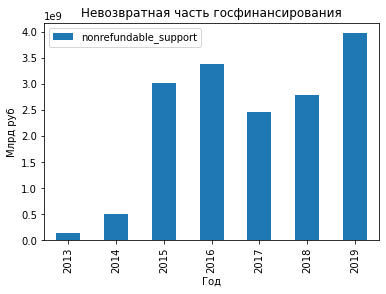

In [91]:
gov_movies_nonref.plot(kind='bar')
plt.title('Невозвратная часть госфинансирования')
plt.xlabel('Год')
plt.ylabel('Млрд руб');

Объём невозвратной господдержки в разы увеличился с 2013 года и продолжил расти до 2016. В 2017 госфинансирование несколько сократилось, но продолжило расти в последующие годы и достигло максимума в 2019. Всего за данный период объём невозвратной господдержки увеличился примерно в 40 раз и составил 4млрд в 2019.

In [92]:
#Изучим кассовые сборы фильмов, получивших господдержку.
gov_movies_box = gov_movies.pivot_table(index='year', values='box_office', aggfunc='sum')

In [93]:
gov_movies_box

,box_office
year,
2013,2.032239e+07
2014,1.017422e+09
2015,5.785285e+09
2016,6.081708e+09
2017,1.086508e+10
2018,9.934069e+09
2019,8.409627e+09


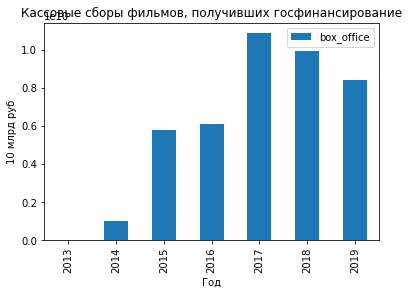

In [94]:
gov_movies_box.plot(kind='bar')
plt.title('Кассовые сборы фильмов, получивших госфинансирование')
plt.xlabel('Год')
plt.ylabel('10 млрд руб');

До 2017 продолжался быстрый рост кассовых сборов. Всего за этот период кассовые сборы возросли почти в 500 раз. Максимум в 10 млрд пришелся на 2017. В 2018 и 2019 этот показатель плавно снизился до 8,4 млрд.  
Напомним, что увеличение кассовых сборов также связано с увеличением числа фильмов, для которых известны кассовые сборы. Доля таких фильмов увеличилась с 11% до 70% в изучаемый период.

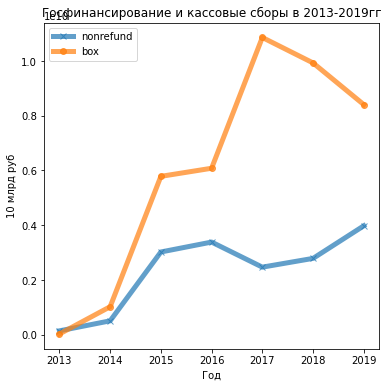

In [95]:
#Сравним изменения в господдержке и кассовых сборах на общем графике.
ax = gov_movies_nonref.pivot_table(index='year', values='nonrefundable_support', aggfunc='sum').plot(
          y='nonrefundable_support',
          style='x-',
          linewidth=5,
          alpha=0.7,
          label='nonrefund',
          figsize=(6,6)
)

gov_movies_box.pivot_table(index='year', values='box_office', aggfunc='sum').plot(
        y='box_office',
        style='o-',        
        ax=ax,
        linewidth=5,
        alpha=0.7,
        label='box',
        figsize=(6,6)
)
plt.title('Госфинансирование и кассовые сборы в 2013-2019гг')
plt.xlabel('Год')
plt.ylabel('10 млрд руб');

Из графика видно, что с 2014 года рост кассовых сборов стал резко опережать рост господдержки. Особенно интересен 2017 год. На этот год приходится довольно значительный провал в господдержке, но при этом кассовые сборы достигли пика (доля фильмов с известным кассовым сбором в 2017 также составляла рекордные 70%)

In [96]:
#Попробуем посмотреть, есть ли линейная связь между невозвратной частью господдержки и кассовыми сборами фильма.
gov_movies['nonrefundable_support'].corr(gov_movies['box_office'])
#Коэффициент Пирсона показывает наличие некоторой положительной связи.

0.4557291723694731

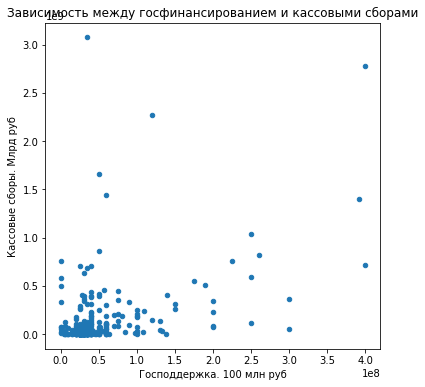

In [97]:
#Продолжим исследовать зависимость между госфинансированием и кассовыми сборами фильма на графике разброса.
gov_movies.plot.scatter(x='nonrefundable_support', y='box_office', figsize=(6, 6))
plt.title('Зависимость между госфинансированием и кассовыми сборами')
plt.xlabel('Господдержка. 100 млн руб')
plt.ylabel('Кассовые сборы. Млрд руб');

У большинства кинокартин при небольшой господдержке такие же скромные кассовые сборы. Видна некоторая корреляция между увеличением господдержки и увеличением кассовых сборов. Есть единичные фильмы, которые с минимальной господдержкой смогли добиться значительных финансовых результатов. Есть также единичные фильмы, которые при большой господдержке либо добились финансового успеха, либо показали средний результат.

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊<a class="tocSkip"> </h2>

Очень здорово, что ты проводишь подобный анализ, находя взаимосвязи между данными. Молодец!)

In [98]:
#Продолжим исследовать связи между госфинансированием и кассовыми сборами фильма с помощью матрицы корреляции Пирсона.
#Заодно исследуем линейные связи для основных числовых столбцов.
gov_movies[['refundable_support','nonrefundable_support', 'budget','ratings', 'box_office']].corr().style.background_gradient()

,refundable_support,nonrefundable_support,budget,ratings,box_office
refundable_support,1.000000,0.359622,0.641224,-0.003797,0.312137
nonrefundable_support,0.359622,1.000000,0.594169,0.125646,0.455729
budget,0.641224,0.594169,1.000000,0.093117,0.361325
ratings,-0.003797,0.125646,0.093117,1.000000,0.143755
box_office,0.312137,0.455729,0.361325,0.143755,1.000000


Как и на графике выше, кассовые сборы показывают наличие некоторой положительной связи с невозвратной частью господдержки. Кроме того, бюджет фильма имеет определённую положительную корреляцию с господдержкой. Интересно, что рейтинг кинофильма напрямую не связан ни с господдержкой, ни с кассовыми сборами. Изучим это поподробнее.

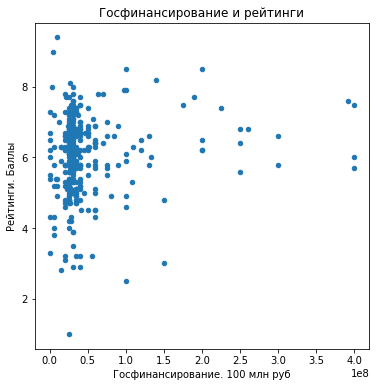

In [99]:
#Проверим есть ли зависимость между госфинансированием и рейтингом фильма.
gov_movies.plot.scatter(x='nonrefundable_support', y='ratings', figsize=(6, 6))
plt.title('Госфинансирование и рейтинги')
plt.xlabel('Госфинансирование. 100 млн руб')
plt.ylabel('Рейтинги. Баллы');

Основной массе фильмов присвоены рейтинги от 5 до 7.  
Фильмы с минимальной господдержкой смогли получить как минимальные, так и максимальные значения рейтинга.  
Фильмы с большой господдержкой получили средние рейтинги.  
Прямой связи, как положительной, так и отрицательной, между господдержкой и рейтингом нет.

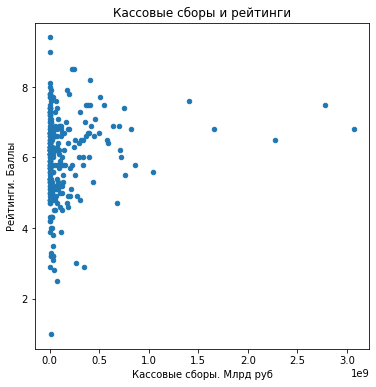

In [100]:
#Проверим есть ли зависимость между кассовыми сборами фильма и его рейтингом.
gov_movies.plot.scatter(x='box_office', y='ratings', figsize=(6, 6))
plt.title('Кассовые сборы и рейтинги')
plt.xlabel('Кассовые сборы. Млрд руб')
plt.ylabel('Рейтинги. Баллы');

Основная часть фильмов имеет скромные кассовые сборы и рейтинг примерно 5-7. 
При увеличении кассовых сборов рейтинг остаётся в рамках среднего.
Самые высокие и самые низкие рейтинги у фильмов с минимальными или небольшими кассовыми сборами.
Явной корреляции между рейтингом и кассовыми сборами нет.

In [101]:
#Изучим связи между господдержкой и окупаемостью кинолент.
#Для этого сначала отсортируем фильмы, получившие госфинансирование, для которых известны кассовые сборы.
gov_movies_box = gov_movies[~(gov_movies['box_office'].isna())]

In [102]:
gov_movies_box.shape[0]
#Таких фильмов 318.

318

In [103]:
#Посчитаем, сколько фильмов, получивших господдержку, окупились в прокате.
gov_movies_success = \
gov_movies_box[gov_movies_box['box_office']>(gov_movies_box['nonrefundable_support']+gov_movies_box['refundable_support'])]

In [104]:
gov_movies_success.shape[0]
#Из 332 фильмов окупилось примерно 35% - 118 кинокартин.

118

In [105]:
#Проверим, насколько кассовые сборы превышают объёмы госфинансирования.
gov_movies_success['ratio'] = \
gov_movies_success['box_office']/(gov_movies_box['nonrefundable_support']+gov_movies_box['refundable_support'])

C:\Users\Suntory1\AppData\Local\Temp\ipykernel_21804\4130209501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gov_movies_success['ratio'] = \


In [106]:
gov_movies_success['ratio'].describe()

count    118.000000
mean       4.718980
std        6.118850
min        1.004272
25%        1.557219
50%        2.698579
75%        5.004937
max       51.226145
Name: ratio, dtype: float64

В наиболее типичном случае кассовые сборы превышают объём господдержки в 1,5-5 раз. Но есть уникальные фильмы, чьи кассовые сборы в 50 раз больше полученной ими господдержки.

In [107]:
#Посмотрим на наиболее популярные жанры коммерчески успешных фильмов.
gov_movies_success['main_genre'].value_counts()

комедия        35
мультфильм     20
драма          19
фантастика      6
ужасы           5
приключения     5
семейный        4
боевик          4
военный         4
спорт           3
фэнтези         3
история         3
триллер         2
биография       2
детектив        1
криминал        1
Name: main_genre, dtype: int64

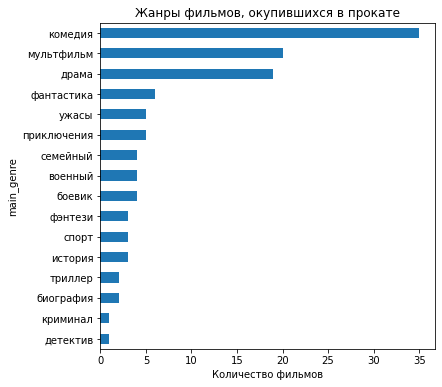

In [108]:
gov_movies_success.groupby('main_genre')['title'].count().sort_values().plot(kind='barh', figsize=(6, 6))
plt.title('Жанры фильмов, окупившихся в прокате')
plt.xlabel('Количество фильмов')
plt.ylabel('Жанр');

С большим отрывом лидируют комедии, мультфильмы и драмы. В совокупности они составляют более половины всех фильмов.

**Фильмы, получившие господдержку:**

Мы начали с выяснения объёма госфинансирования. Была обнаружена неровная тенденция к увеличению господдержки. Всего объёмы госфинансирования выросли в примерно 40 раз в течение изучаемого периода и достигли 4млрд в 2019г.

Мы также изучили кассовые сборы фильмов, получивших господдержку. В течение изучаемого периода кассовые сборы увеличились примерно в 500 раз и достигли максимума в 10 млрд в 2017г. С 2014г. рост кассовых сборов стал значительно превышать объёмы господдержки.

Был исследован рейтинг фильмов, получивших господдержку. Типичные рейтинги для таких фильмов - 5-7 баллов. Ни кассовые сборы, ни объём госфинансирования не оказывают прямого воздействия на рейтинг фильма.

В конце мы изучили окупаемость фильмов, получивших господдержку. Выяснилось, что окупается примерно 35% всех кинолент, получивших госфинансирование. При этом в среднем кассовые сборы в 1,5-5 раз превышают объёмы господдержки. Наиболее популярными жанрами среди оккупившихся кинолент оказались комедии, мультфильмы и драмы. На их долю приходится более половины всех фильмов.

### Шаг 5. Напишите общий вывод

### Анализ датасетов mkrf_movies.csv и mkrf_shows.csv

Анализ включает в себя 4 шага, описанных ниже.

**Шаг 1. Формирование и изучение датасета**

Предоставленные клиентом датасеты mkrf_movies.csv и mkrf_shows.csv были объединены в единый датасет movies. Полученный датасет содержит информацию о 7486 фильмах, вышедших в прокат в РФ в период с 2010 по 2019гг, включая такую информацию, как название фильма, номер прокатного удостоверения, имя режиссера, жанровую принадлежность, общий бюджет, сумму возвратной и невозвратной помощи от государства, сумму кассового сбора, дату выхода в прокат и др. Особенностью датасета является то, что сумма кассового сбора указана для менее чем половины всех кинолент (3158 фильмов). Кроме того, общий бюджет, а также возвратные и невозвратные части господдержки указаны только для части фильмов, произведённых в РФ или при её участии, а именно для 4% от всех фильмов в датасете (332 фильма).


**Шаг 2. Предобработка данных**

2.1. Были исправлены типы данных в некоторых столбцах.  
2.2. Пропущенные значения были проанализированы и по возможности удалены.  
2.3. Были обнаружены неполные дубликаты фильмов. Принято решение не удалять их.  
2.4. Были проанализированы категориальные данные и указан способ, как улучшить их структуру.  
2.5. Были проанализированы количественные значения. Найдено незначительное количество фильмов с отрицательными бюджетами. Были указаны возможные причины этого.  
2.6. Было сформировано 3 новых столбца: year, main_director, main_genre.


**Шаг 3. Анализ датасета movies**

3.1. Количество фильмов, выходивших в прокат ежегодно:  
- сильно варьируется по годам,
- максимальные показатели - 985 фильмов в 2010 году и 930 в 2019 году,
- минимальный показатель - 505 фильмов в 2017 году,
- медианный показатель - 750 фильмов ежегодно,
- с 2014 года видна тенденция к увеличению количества фильмов в прокате.

3.2. Доля фильмов с известным кассовым сбором:  
- заметно выросла в изучаемый период: с 11% в 2010 году до 70% в 2017 году,
- перенесла спад до 57% в 2018-2019гг,
- оказывает сильное влияние на объёмы кассовых сборов.

3.3. Кассовые сборы:
- начали резко расти с 2014 года,
- выросли в 20000 раз за исследуемый период,
- достигли максимума в 2018 году (около 50млрд),
- минимальный показатель был в 2010 году (около 2,4млн),
- зависят не только от качества фильма, но и от полноты учета кассовых сборов,
- имеются яркие выбросы - фильмы с очень крупными кассовыми сборами.

3.4. Возрастные категории:
- оказывают сильное влияние на кассовые сборы фильма,
- более половины суммы кассового сбора приносят категории "12+" и "6+",
- явными аутсайдерами являются категории "0+" и "18+".


**Шаг 4. Фильмы, получившие господдержку**

4.1. Невозвратная часть господдержки:
- имеет тенденцию к неравномерному росту,
- увеличилась в 40 раз в течение изучаемого периода,
- обычно покрывает от 37% до 65% общего бюджета фильма,
- была минимальной в 2013 году (130 млн),
- достигла максимума в 2019 году (4 млрд).

4.2. Кассовые сборы:
- быстро росли до 2017 года,
- пережили плавный спад в 2018-2019гг,
- в течение изучаемого периода увеличились примерно в 500 раз,
- росли в том числе и благодаря увеличению в прокате доли фильмов с известным кассовым сбором,
- были минимальными в 2013 году (20 млн),
- достигли максимума в 2017 году (10 млрд).

4.3. Рейтинг:
- наиболее типичные рейтинги - 5-7 баллов из 10,
- не зависит ни от объёма господдержки, ни от кассовых сборов.

4.4. Окупаемость:
- примерно 40% фильмов, получивших господдержку, достигают окупаемости,
- кассовые сборы таких фильмов в среднем превышают объёмы господдержки в 1,5-5 раз,
- более половины коммерчески успешных фильмов приходится на 3 жанра: комедии, драмы и мультфильмы.

**Общие выводы**

1. Киноиндустрия в РФ в 2010-2019гг.  
Количество фильмов, ежегодно выходивших в прокат, сильно варьировалось от года к году. С 2014 года есть тенденция на увеличение количества фильмов в прокате, однако уровень 2010 года так и не был достигнут.  
Заметно улучшился учет кассовых сборов: к 2019 году у половины фильмов были известны кассовые сборы. Это также привело к значительному росту объёма кассовых сборов.
2. Господдержка в киноиндустрии  
Вклад государства в отечественную киноиндустрию значительно вырос в исследуемый период: невозвратная часть господдержки увеличилась на 40%. Кроме того, рост госфинансирования привел к некоторому увеличению кассовых сборов, но не отразился на рейтингах фильмов.  
Около 35% фильмов, поддержанных государством, смогли добиться окупаемости. Их кассовый сбор, как правило, превышал объём господдержки в 1,5-5 раз.